 #      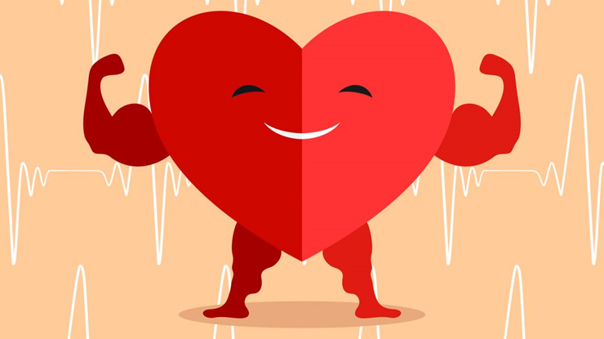

# ABOUT THIS DATABASE

#### Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

#### Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

#### People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


# What is the content of this study?

#### This study includes visualizations of who has this diseses , how and what factors are associated with cardiovascular diseases.


# Data Understanding

**Age**  : Indicates the age of patient 

**Anemia** : 0 =NO , 1=YES ; Anemia is when the body does not have enough red blood cells.

**Creatine_phosphokinase(CPK is modified version in my data)** :  Level of the CPK enzyme in the blood (mcg/L).

**Diabetes** : 0=NO ,1=YES ; Fasting blood glucose level in healthy individuals is in the range of 70-100 mg / dL. If the level of sugar in the blood exceeds this range, it usually indicates diabetes.

**Ejection_fraction** : The percentage of blood pumping into the heart. normal is 55% and above.

**High_blood_pressure(HBP is modified version in my data)** : 0=NO, 1=YES ; Whether the patient has high blood pressure or not.

**Platelets** : Platelet is the name given to the cells involved in the formation of blood clots. The normal value of thrombocyte in the blood is 150 thousand between 450 thousand  in one mm3 of blood.

**Serum_creatinine** : Level of Creatine produced from the kidneys in the blood.

**Serum_sodium** : Level of serum creatinine in the blood. The normal range for sodium in the blood is 135-145 mEq / L. A situation with more than 145 millimoles of sodium in a liter of blood means that the body loses more water than it enters the body.

**Sex** :  0=FEMALE , 1=MALE ; Gender of patient.

**Smoking** : 0=NOT SMOKING, 1=SMOKING.

**Time** : Follow up days.

**Death_event** : Whether patient died during follow up period.



In [ ]:
#import libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import os


In [ ]:
#import data

df = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [ ]:
df.sample(5)


In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
#Shortening long names in database
df.rename(columns={ 'high_blood_pressure' : 'hbp' , 'creatinine_phosphokinase' : 'cpk' ,'DEATH_EVENT':'death_event', }  , inplace=True)


In [ ]:
#check the data if there are any null values
df.isnull().values.any()

In [ ]:
# if data has null values , check the sum of null values

df.isnull().sum()

In [ ]:
df.mean()

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix ')



According to the correlation table:
* There is a strong positive correlation between age, serum creatine and death event rates. In addition, we can observe that death rates increase with the increase in serum creatine and age.

* According to our dataset, Sex and smoking rates show a positive correlation between themselves. This rate shows that the number of smokers is higher in men than in women.


In [ ]:
men        =df[df['sex']==1]
women      =df[df['sex']==0]
values_sex =[len(men),len(women)]
labels_sex     = ['Male','Female']

men_survive   = df[(df['death_event']==0) & (df['sex']==1)] 
men_die       = df[(df['death_event']==1) & (df['sex']==1)]
women_survive = df[(df['death_event']==0) & (df['sex']==0)]
women_die     = df[(df['death_event']==1) & (df['sex']==0)]

value_total   = [len(men_survive),len(men_die),len(women_survive),len(women_die)]
labels     = ['Male - Survived','Male - Died', 'Female -  Survived', 'Female - Died']

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels_sex, values=values_sex, title='Female-Male Ratio',pull=[0.02, 0.02]),
              1, 1)
fig.add_trace(go.Pie(labels=labels ,title='Female-Male Mortality Ratio', values=value_total, pull=[0.02, 0.02, 0.02, 0.02]),
              1, 2)


* There are more male in the dataset. Consequently, male death rates are higher than female death rates.

In [ ]:
fig = px.histogram(df, x='age', color='sex', marginal="box", hover_data=df.columns,title='Analysis in Age on Gender')
fig.show()

* According to this table, the majority of the data set is between the ages of 58-62.

In [ ]:
not_dead= df[(df['death_event']==0) & (df['age']>=50)] 
dead    = df[(df['death_event']==1) & (df['age']>=50)]


value_total   = [len(not_dead),len(dead)]
labels     = ['Not died people','Died People']

figure = go.Figure(data=[go.Pie(labels=labels ,title='Died and not died people between 60 and 95 years old', values=value_total, pull=[0.02, 0.02])])

figure.show()

* Mortality rates for patients aged 60 to 95.

In [ ]:
figure = px.histogram(df, x='age', color='smoking', marginal="rug", hover_data=df.columns,title='Analysis in Age on smoking')
figure.show()

* The majority of the patients are between the ages of 58-62 and the group with the highest number of smoking patients.

In [ ]:
fig = px.strip(df, x="smoking", y="time", color="death_event")
fig.show()

* The correlation between smoking and non-smoking death event over time.

In [ ]:
figure = px.histogram(df, x='age', y='death_event',color='smoking', marginal="violin", hover_data=df.columns,title='Analysis Death event in smoking according to age')
fig.update_layout(template = 'seaborn')
figure.show()

* The group in which smoking has the greatest impact on mortality rates includes the 68-72 age range.
* Approximately 55% of smoking patients in this group seem to have lost their lives.

In [ ]:
fig = px.pie(df, values='anaemia',names='death_event', title='Analysis anaemia on Death Event')
fig.show()

* About 35% of those who died have anaemia .
* It has almost the same rate as smokers, in this context, perhaps a link can be established between smokers and those with anemic conditions.


In [ ]:
smoking_yes_anemia     = df[(df["smoking"]==1) & (df['anaemia']==1)]
smoking_yes_anemia_no  = df[(df["smoking"]==1) & (df['anaemia']==0)]
smoking_no_aneamia_yes = df[(df["smoking"]==0) & (df['anaemia']==1)]
smoking_no_anemia_     = df[(df["smoking"]==0) & (df['anaemia']==0)]

labels = ['Smoking Yes, Anaemia Yes --> Dead','Smoking Yes, Anaemia No --> Dead', 'Smoking No, Anaemia Yes --> Dead', 'Smoking No, Anemia No--> Dead']
values = [len(smoking_yes_anemia     [df["death_event"]==1]),
          len(smoking_yes_anemia_no  [df["death_event"]==1]),
          len(smoking_no_aneamia_yes [df["death_event"]==1]),
          len(smoking_no_anemia_     [df["death_event"]==1])]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])

fig.update_layout(title_text="The reflection of the relationship between anaemia and smoking on deaths.",template='seaborn')
fig.show()

* We can say that the anaemia condition affects the death eventrate more than smoking.



In [ ]:
figure = px.pie(df, values='diabetes',names ='death_event',title='Analysis in diabetes')
figure.show()

* Approximately 32% of the patients with diabetes seem to have died, if we look at the data in detail :

In [ ]:
fig = px.density_heatmap(df, x="diabetes", y="age", facet_row="death_event",facet_col="sex")
fig.update_layout(title_text="Analysis of Age and Diabetes on Death Event",template='seaborn')

fig.show()


* The age range in which diabetes affects death rates most in male and female patients is 60-69.
* The most common age range for diabetes seems to be 50 to 69.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = df['cpk'],
        xbins=dict( # bins used for histogram
        start=10,
        end=600,
        size=15
    ),

))
fig.update_layout(template = 'seaborn',title=' CPK distribution')

In [ ]:
fig = px.scatter(df, x="cpk", y="age", color="death_event", trendline="lowess")
fig.update_layout(title= 'Analysis of Creatine Phosphokinase on death event and age',template = 'seaborn')

fig.show()

* Mortality rates according to creatine phosphokinase showed a wide spread.
* but the range with the most deaths is between 0 and 1000 cpk.

In [ ]:
fig = px.histogram(df,"serum_creatinine",color='death_event',title='Serum creatinine distribution',nbins=100)
fig.update_layout(template = 'seaborn')
fig.show()

* Serum_creatininie level, which is most reflected in death rates, appears to be between 0.95 and 1.04.

* In addition, the serum_creatinine level of other surviving patients is mostly at this level.

In [ ]:
fig = px.scatter(df, x='serum_creatinine', y='age', color='death_event',trendline="ols",marginal_y='box')
fig.update_layout(template = 'seaborn',title='Analysis of serum creatinine on age and death_event')
fig.show()

* According to this table, it would not be wrong to say that the increase in serum creatinine ratio affects the elderly population. So death events increase with serum creatinine

In [ ]:
fig = px.scatter_3d(df, x='serum_creatinine', y='serum_sodium', z='time', color='death_event')
fig.update_layout(template = 'seaborn',title='Analysis of death event ,according to serum_sodium , serum_creatinine and time. ')
fig.show()

* The highest number of deaths is in the 0-50 time range, with a serum creatine ratio of 1 to 2, and a serum sodium range of 110 to 140.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = df['serum_sodium']))
fig.update_layout(template = 'seaborn',title='Serum Sodium Distribution')

* The most visible range of serum sodium values 134 and 136 values

In [ ]:
alive      = df[df['death_event']==0]['serum_sodium']
dead         = df[df['death_event']==1]['serum_sodium']
hist_data = [alive,dead]
group_labels = ['Alive', 'Dead']
fig = ff.create_distplot(hist_data, group_labels, bin_size=1)
fig.update_layout(title_text="Analysis in Serum Sodium on Survival Status",template = 'seaborn')
fig.show()

* Within the most common serum sodium value range 134 to 136, the most deaths occurred.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = df['ejection_fraction'] ))
fig.update_layout(template = 'seaborn',title='Ejection_fraction Distribution')

In [ ]:
fig = px.density_contour(df, x='ejection_fraction', y='serum_sodium',color="death_event")
fig.update_layout(template = 'seaborn',title=' Density of ejection fraction and serum sodium')
fig.show()

* The values where the most deaths occur are the values where serum sodium is in the 24-35 range of 132-137 ejection fraction.

In [ ]:
fig = px.pie(df, values='hbp',names='death_event',title='Analysis in High blood pressure on Death Event')
fig.show()

In [ ]:
fig = px.scatter(df, x="platelets", y="age", facet_col="hbp", color="death_event", trendline="lowess")
fig.show()

* According to this table, we can say that there is a weak positive relationship between platelets and hbp.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = df['platelets'] ))
fig.update_layout(template = 'seaborn',title='Platelets Distribution')

In [ ]:
fig = px.histogram(df,'platelets',color='death_event',title='Death Event of Platelets',nbins=100)
fig.update_layout(template = 'seaborn')
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
model_list = [KNeighborsClassifier(n_jobs = -1), 
              RandomForestClassifier(n_jobs = -1), 
              DecisionTreeClassifier(), 
              GaussianNB(), 
              SVC(), 
              GradientBoostingClassifier(),
              BaggingClassifier(), 
              LogisticRegression()
             ]

In [ ]:
normalizer = MinMaxScaler()
df = pd.DataFrame(normalizer.fit_transform(df), index = range(len(df)), columns = df.columns)

In [ ]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
def evaluate_model(model, y_pred, y_true):

    
    acc_result = accuracy_score(y_pred, y_true)
    prec_result = precision_score(y_pred, y_true)
    recall_result = recall_score(y_pred, y_true)
    f1_result = f1_score(y_pred, y_true)
    
    return {'Accuracy' : acc_result, 
            'Precision' : prec_result, 
            'Recall' : recall_result, 
            'F1_Score' : f1_result
           }
    
    

In [ ]:
results = dict()
for model in model_list:
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[str(model)] = evaluate_model(model, y_pred, y_test)
    

In [ ]:
results